In [5]:
"""Try to find a solution for ρ' > ρ,
when going from (M, d) |-> (M, sqrt(d)).
This seems to be impossible for the general case,
and assuming D ~ N(μ,σ) is a bad idea:
What happens to sqrt(D) for negative distances?
"""
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.stats import P, E, variance, Normal, Variance, Expectation
import sympy.stats as stats

In [7]:
X = stats.symbolic_probability.RandomSymbol("X")

# intrinsic dim for a metric space (M,d),
# where X = d(a,b) with a,b \in M and randomly chosen
rho = Expectation(X) ** 2 / (2 * Variance(X))
simplify(rho)

Expectation(X)**2*Variance(X)**(-1)/2

In [8]:
rho_quad = rho.subs(X, X**2)
# if the original space becomes more complicated
# by mapping d -> \sqrt(d), we call it "worse":
original = rho_quad
sqrt_space = rho
is_worse = original < sqrt_space
simplify(is_worse)

Expectation(X)**2*Variance(X)**(-1)/2 > Expectation(X**2)**2*Variance(X**2)**(-1)/2

In [13]:
mu, sig = symbols("\mu \sigma", positive=True)
Z = Normal("Z", mu, sig)
worse_N = is_worse.subs({X: sqrt(abs(Z))})
simplify(worse_N)

TypeError: 'Dummy' object is not iterable

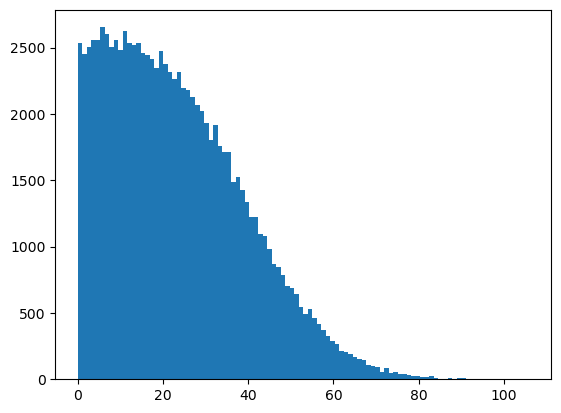

In [30]:
from scipy.stats import norm as n_normal

plt.hist(np.abs(n_normal(20, 20).rvs(100000)), bins=100);

In [66]:
# we know that (M, \sqrt(d)) should be Ptolemaic
# but writing X**2 is easier than \sqrt(X)
rho_quad = E(X**2) ** 2 / (2 * variance(X**2))
rho_sqr = E(sqrt(X)) ** 2 / (2 * variance(sqrt(X)))
simplify(rho_sqr)

Expectation(sqrt(X))**2*Variance(sqrt(X))**(-1)/2

In [181]:
# is the intrinsic dim always higher when mapping
# d -> \sqrt(d) ?
is_more_complex = rho < rho_sqr
is_more_complex

Expectation(X)**2*Variance(X)**(-1)/2 < Expectation(sqrt(X))**2*Variance(sqrt(X))**(-1)/2

In [191]:
# sympy fails at simplifying the sqrt expression
# let's assume our original distribution uses X**2
# and the Pto. version X

original = rho_quad
projected_space = rho
is_more_complex = original < projected_space
is_more_complex

Expectation(X**2)**2*Variance(X**2)**(-1)/2 < Expectation(X)**2*Variance(X)**(-1)/2

In [199]:
# for reasons I don't understand yet, the simplifier does
# not replace these:
delta = delta.subs({Variance(Z) ** (-1): sig ** (-2), Variance(Z**2): variance(Z**2)})
delta = simplify(delta)
delta_n = lambdify((mu, sig), delta, "numpy")
delta

\mu**2/(2*\sigma**2) < Expectation(X)**2*Variance(X)**(-1)/2

In [195]:
solve(delta, sig)

NotImplementedError: 
The inequality, -_X**2*Variance(_X)**(-1)/2 + \mu**2/(2*x**2) < 0,
cannot be solved using solve_univariate_inequality.

Set(True)

Union(Intersection(Interval.open(0, 3**(1/4)*\mu), Set(True)), Intersection(Interval.open(-3**(1/4)*\mu, 0), Set(True)))

\sigma < 3**(1/4)*\mu

In [142]:
term = delta.args[1].args[0].args[1]
print(term)

Variance(Z)**(-1)


Reals

In [126]:
for term in delta.term:
    print(term)

TypeError: 'Mul' object is not iterable

In [117]:
variance(Z) ** (-1)

\sigma**(-2)

In [119]:
variance(Z**2)

2*\mu**4 + 8*\mu**2*\sigma**2 + 4*\sigma**4 + 2*(-2*\mu**2 - 2*\sigma**2)*(\mu**2/2 + \sigma**2/2)

In [118]:
variance(sqrt(Z))

KeyboardInterrupt: 

In [116]:
solveset(delta, sig)

AttributeError: 'NoneType' object has no attribute 'gens'

In [84]:
mu_range = np.linspace(0, 100)
sig_range = np.linspace(0.01, 10)
mumu, sigsig = np.meshgrid(mu_range, sig_range)
delta_n(mumu, sigsig)

NameError: name 'Variance' is not defined